# PCA Whitening

Below is an implementation of PCA whitening on a multivariate Gaussian distribution.

The dataset is first generated.

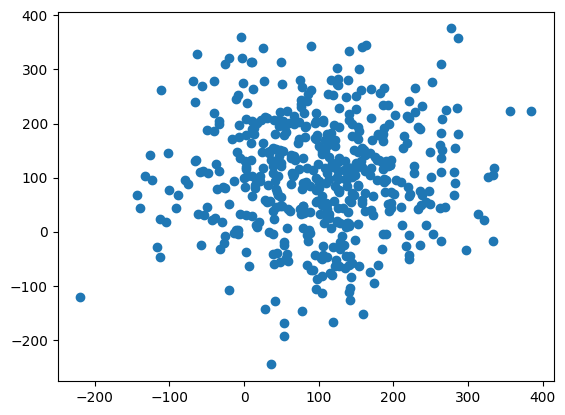

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage

dataset = []

for _ in range(500):
    offset = (100, 100)
    multiplier = 100
    dataset.append(multiplier * np.random.normal(0, 1, 2) + offset)

dataset = np.array(dataset)
original_dataset = dataset.copy()

plt.scatter(*zip(*dataset))
plt.show()

Find the covariance matrix and then remove the offset from the distribution so that the expected value μ = 0.

In [44]:
covariance_matrix = np.cov(dataset.T)
print(covariance_matrix)

[[ 8949.354291     277.06013226]
 [  277.06013226 11205.64237956]]


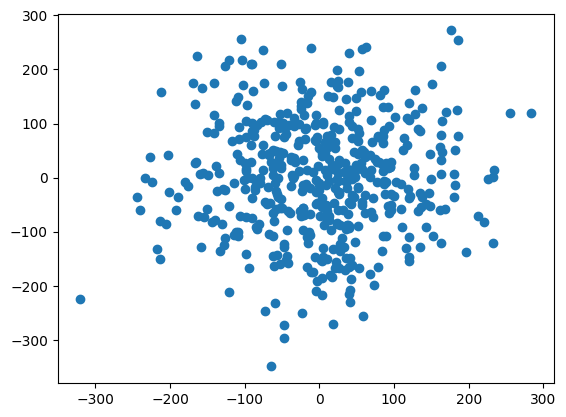

In [69]:
dataset -= dataset.mean(axis=0)

plt.scatter(*zip(*dataset))
plt.show()

Afterwards, map the dataset to $x \mapsto \Lambda^{-1/2} U^T (x - \mu)$. To do this, find the eigenvalues and eigenvectors of the covariance matrix.

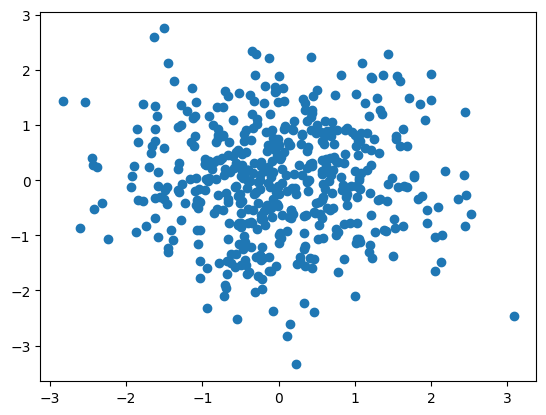

The covariance of this matrix is:
[[ 1.00000000e+00 -4.09380835e-17]
 [-4.09380835e-17  1.00000000e+00]]


In [72]:
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

lmb = np.diag(1 / np.sqrt(eigenvalues))

final = lmb.dot(eigenvectors.T).dot(dataset.T)

plt.scatter(*final)
plt.show()

print("The covariance of this matrix is:")
print(np.cov(final))